In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.cm as cm


In [7]:
train_dir = '/Users/dhruvalokesh/Desktop/Fruits Classification/train'
valid_dir = '/Users/dhruvalokesh/Desktop/Fruits Classification/valid'
test_dir = '/Users/dhruvalokesh/Desktop/Fruits Classification/test'


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
class_names = sorted(os.listdir(train_dir))
n_classes = len(class_names)

print(f"Total number of classes: {n_classes}")
print(f"Classes: {class_names}")


Total number of classes: 6
Classes: ['.DS_Store', 'Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


In [9]:
import os

# Define the directory containing your training data
train_dir = '/Users/dhruvalokesh/Desktop/Fruits Classification/train'  # Replace with the actual path

# Get the list of class names and filter out '.DS_Store'
class_names = sorted([cls for cls in os.listdir(train_dir) if cls != '.DS_Store'])

# Calculate the number of classes
n_classes = len(class_names)

print(f"Total number of classes: {n_classes}")
print(f"Classes: {class_names}")


Total number of classes: 5
Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


In [10]:
class_dis = [len(os.listdir(os.path.join(train_dir, name))) for name in class_names]
print(class_dis)

[1940, 1940, 1940, 1940, 1940]


In [11]:
df = pd.DataFrame({
    'Category': class_names,
    'Values': class_dis
})

norm = plt.Normalize(df['Values'].min(), df['Values'].max())
cmap = plt.colormaps['Spectral']

colors = cmap(norm(df['Values']))
fig, ax = plt.subplots(figsize=(21, 9))
bars = ax.bar(df['Category'], df['Values'], color=colors)

ax.set_title('Sample Bar Chart with Color Range')
ax.set_xlabel('Category')
ax.set_ylabel('Values')

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Values')

plt.show()

In [12]:
def display_sample_images(train_dir, class_names, n_images=5):
    fig, axes = plt.subplots(len(class_names), n_images, figsize=(n_images * 2, len(class_names) * 2))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(train_dir, class_name)
        images = os.listdir(class_path)[:n_images]
        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = image.load_img(img_path, target_size=(224, 224))
            ax = axes[i, j]
            ax.imshow(img)
            ax.axis('off')
            if j == 0:
                ax.set_title(class_name, fontsize=10)
    plt.tight_layout()
    plt.show()

display_sample_images(train_dir, class_names, n_images=8)

In [13]:
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))


In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 9700 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [16]:
#Feature extraction is done here

In [15]:
def extract_features(generator, model):
    features = model.predict(generator)
    labels = generator.classes
    return features, labels

train_features, train_labels = extract_features(train_generator, base_model)
valid_features, valid_labels = extract_features(valid_generator, base_model)
test_features, test_labels = extract_features(test_generator, base_model)

304/304 ━━━━━━━━━━━━━━━━━━━━ 47s 155ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [16]:
print(train_features.shape, valid_features.shape, test_features.shape)


(9700, 1280) (200, 1280) (100, 1280)


In [17]:
print(train_labels.shape, valid_labels.shape, test_labels.shape)


(9700,) (200,) (100,)


In [20]:
#SVM model

In [18]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", C=0.0025)
svm_model.fit(train_features, train_labels)
svm_predicitions_valid = svm_model.predict(valid_features)

print(classification_report(valid_labels, svm_predicitions_valid))
print('Accuracy valid:',accuracy_score(valid_labels, svm_predicitions_valid))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.90      0.93      0.91        40
           2       0.80      0.82      0.81        40
           3       0.95      0.90      0.92        40
           4       0.93      0.93      0.93        40

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Accuracy valid: 0.875


In [19]:
svm_predicitions_test = svm_model.predict(test_features)
print(classification_report(test_labels, svm_predicitions_test))
print('Accuracy test:',accuracy_score(test_labels, svm_predicitions_test))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20
           3       0.80      0.80      0.80        20
           4       0.94      0.85      0.89        20

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

Accuracy test: 0.86


In [23]:
#Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_model.fit(train_features, train_labels)
rf_predictions_valid = rf_model.predict(valid_features)

print(classification_report(valid_labels, rf_predictions_valid))
print('Accuracy valid:',accuracy_score(valid_labels, rf_predictions_valid))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68        40
           1       0.93      0.97      0.95        40
           2       0.82      0.80      0.81        40
           3       0.83      0.88      0.85        40
           4       0.90      0.90      0.90        40

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Accuracy valid: 0.84


In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(train_features, train_labels)

lr_predictions_valid = lr_model.predict(valid_features)
print(classification_report(valid_labels, lr_predictions_valid))
print('Accuracy valid:', accuracy_score(valid_labels, lr_predictions_valid))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.88      0.93      0.90        40
           2       0.78      0.80      0.79        40
           3       0.92      0.82      0.87        40
           4       0.93      0.97      0.95        40

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Accuracy valid: 0.86


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path, lr_model, svm_model, base_model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as per your model's requirement
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Get features from the base model (e.g., CNN features)
    features = base_model.predict(img_array)

    # Flatten the features to make them compatible with the SVM model
    features = features.flatten().reshape(1, -1)  # Flatten the 4D features into a 2D array (1, n_features)

    # Predict using the SVM model
    predictions = svm_model.predict(features)
    
    # Display the results
    print(f"Predictions: {predictions}")
    print(f"Class indices: {test_generator.class_indices}")  # Optional, if needed for class names

    # Display the input image
    plt.imshow(img)
    plt.show()

# Example usage
predict_image('/Users/dhruvalokesh/Desktop/My_fruits/test-multiple_fruits/mango.jpg', lr_model, svm_model, base_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predictions: [3]
Class indices: {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predictions: [2]
Class indices: {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


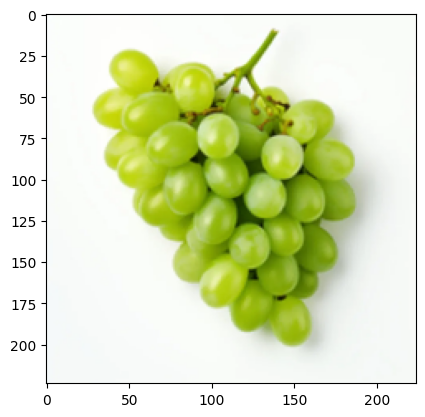

In [33]:
predict_image('/Users/dhruvalokesh/Desktop/gr.jpg', lr_model, svm_model, base_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predictions: [0]
Class indices: {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


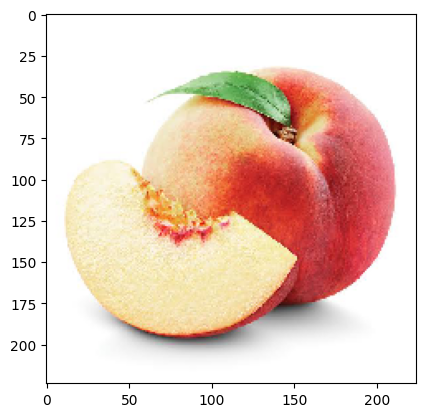

In [34]:
predict_image('/Users/dhruvalokesh/Desktop/pe.jpg', lr_model, svm_model, base_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [1]
Class indices: {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


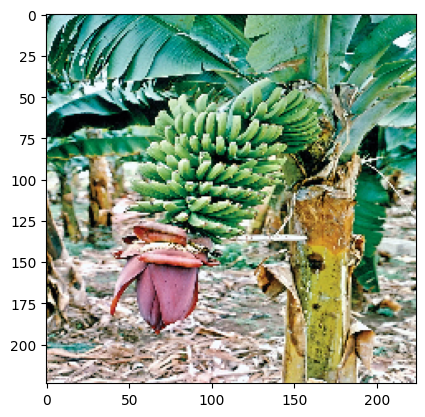

In [36]:
predict_image('/Users/dhruvalokesh/Desktop/b.jpg', lr_model, svm_model, base_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [0]
Class indices: {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


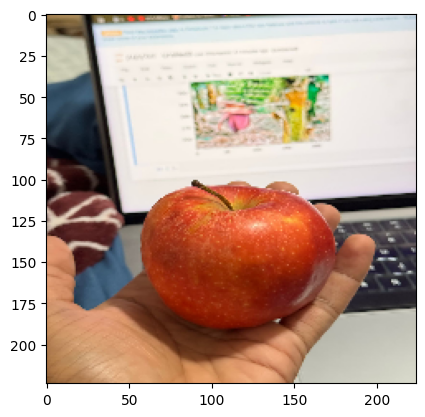

In [37]:
predict_image('/Users/dhruvalokesh/Downloads/WhatsApp Image 2024-12-09 at 8.35.20 PM.jpeg', lr_model, svm_model, base_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
The predicted fruit is Apple, and the total calories are 78.0 kcal.


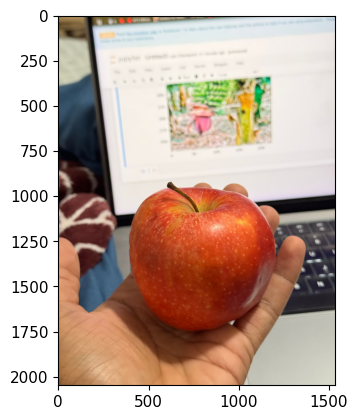

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.svm import SVC
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Define a dictionary with calories per 100g of each fruit
fruit_calories = {
    'apple': 52,  # Calories per 100 grams
    'banana': 89,
    'grape': 69,
    'mango': 60,
    'strawberry': 32
}

def calculate_calories(fruit, weight=100):
    """
    Calculate the total calories based on the fruit type and weight.
    Default weight is 100 grams.
    """
    calories_per_100g = fruit_calories.get(fruit.lower(), None)
    
    if calories_per_100g:
        total_calories = (calories_per_100g * weight) / 100  # Formula for calories based on weight
        return total_calories
    else:
        return "Fruit not found in the calorie database."

def load_image(img_path):
    """
    Load and preprocess an image for the model prediction.
    """
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def predict_and_calculate(img_path, svm_model, base_model, class_indices, train_features, train_labels):
    """
    Predict fruit from the image, then calculate calories based on the prediction.
    """
    # Train the SVM model (if not already trained)
    svm_model.fit(train_features, train_labels)
    
    # Load and preprocess the image
    img_array = load_image(img_path)
    
    # Get the features from the base model (MobileNetV2)
    features = base_model.predict(img_array)
    
    # Flatten the features to make them compatible with the SVM model
    features = features.flatten().reshape(1, -1)  # Flatten to 2D array
    
    # Predict using the SVM model
    fruit_index = svm_model.predict(features)
    
    # Map the index to the actual fruit name
    fruit_name = list(class_indices.keys())[list(class_indices.values()).index(fruit_index[0])]
    
    # Calculate calories for the predicted fruit
    calories = calculate_calories(fruit_name, weight=150)  # Assume the weight is 150g for this example
    
    # Display the results
    print(f"The predicted fruit is {fruit_name}, and the total calories are {calories} kcal.")
    
    # Display the input image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.show()

# Example usage
img_path = '/Users/dhruvalokesh/Downloads/WhatsApp Image 2024-12-09 at 8.35.20 PM.jpeg'  # Replace this with your image path
class_indices = {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}  # Example class indices
svm_model = SVC(kernel="linear", C=0.0025)  # Your trained SVM model
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))  # Base model

# Assuming you have already defined train_features and train_labels
predict_and_calculate(img_path, svm_model, base_model, class_indices, train_features, train_labels)


In [36]:
# joblib.dump(svm_model, 'svm_model.pkl')

# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras import layers, models

# # Load MobileNetV2 pre-trained model
# base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))


Processing bh.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing bd.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processing s.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processing hg.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processing j.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processing M.JPEG...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processing pp.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Processing b.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Processing nbfdd.jpeg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


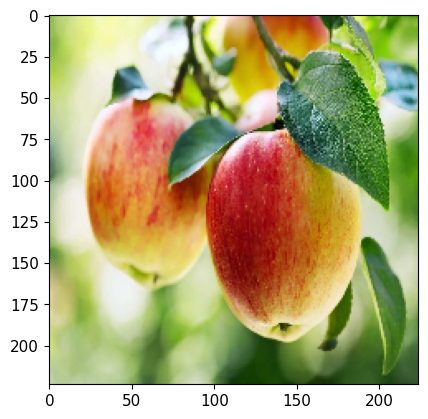

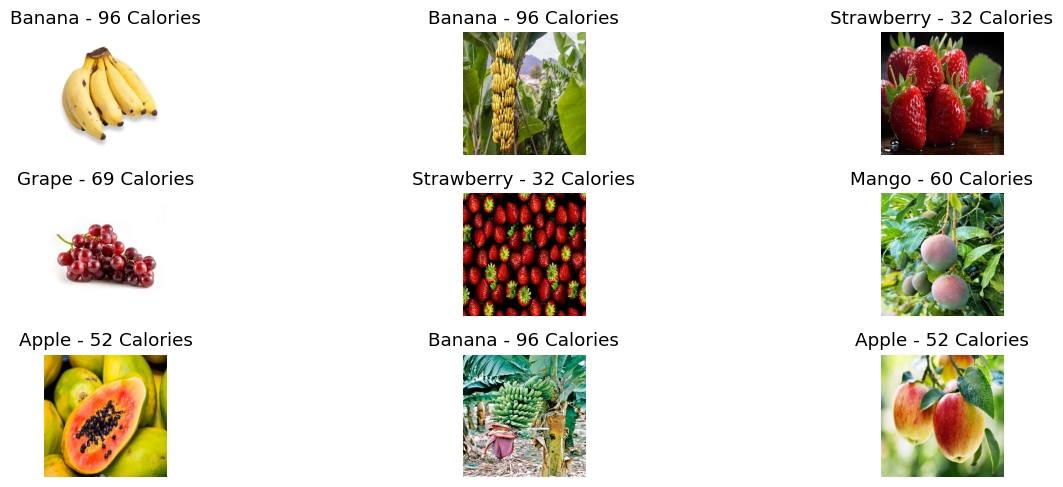

In [90]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import math

def calculate_calories(fruit_name):
    """Function to calculate calories based on fruit name."""
    fruit_calories = {
        "Apple": 52,  # Calories per 100g
        "Banana": 96,
        "Grape": 69,
        "Mango": 60,
        "Strawberry": 32
    }
    # Return the calories for the given fruit (if not found, return 0)
    return fruit_calories.get(fruit_name, 0)

def is_valid_image(filename):
    """Check if the file has a valid image extension."""
    valid_extensions = ['.jpg', '.jpeg', '.png']
    return any(filename.lower().endswith(ext) for ext in valid_extensions) and not filename.startswith('.')

def predict_image(img_path, lr_model, svm_model, base_model, class_indices):
    """Predict the fruit type and calculate calories for a given image."""
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as per your model's requirement
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Get features from the base model (e.g., CNN features)
    features = base_model.predict(img_array)

    # Flatten the features to make them compatible with the SVM model
    features = features.flatten().reshape(1, -1)  # Flatten the 4D features into a 2D array (1, n_features)

    # Predict using the SVM model
    predictions = svm_model.predict(features)
    predicted_class_index = predictions[0]

    # Map the predicted class index to fruit name
    fruit_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]
    
    # Calculate calories
    calories = calculate_calories(fruit_name)

    return img, fruit_name, calories  # Ensure only three values are returned

def process_images_in_folder(folder_path, lr_model, svm_model, base_model, class_indices):
    """Process all images in a folder and return predictions and calorie calculations."""
    results = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        
        # Skip non-image files and .DS_Store
        if not os.path.isfile(img_path) or not is_valid_image(filename):
            continue

        print(f"Processing {filename}...")

        # Load and display the image directly
        img = image.load_img(img_path, target_size=(224, 224))  # Load the image
        plt.imshow(img)  # Display image
        #plt.show()  # Ensure the image is shown
        
        img, fruit_name, calories = predict_image(img_path, lr_model, svm_model, base_model, class_indices)
        results.append((img, fruit_name, calories, img_path))  # Include img_path for debugging or further use
    
    return results

def display_images_in_grid(results, num_rows=3):
    """Display images in a grid with fruit names and calorie counts."""
    num_images = len(results)
    num_columns = math.ceil(num_images / num_rows)  # Calculate the number of columns needed
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    for i, (img, fruit, calories, _) in enumerate(results):
        if i < len(axes):  # Make sure we don't exceed the number of axes
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide the axes
            axes[i].set_title(f"{fruit} - {calories} Calories")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
folder_path = '/Users/dhruvalokesh/Desktop/fruitssss'  # Update this path to your folder containing images
# You should load your saved models (lr_model, svm_model, base_model) before calling process_images_in_folder
results = process_images_in_folder(folder_path, lr_model, svm_model, base_model, class_indices)

# Display the images in a 3-row grid
display_images_in_grid(results, num_rows=3)


In [46]:
plt.imshow(img)  # Display the image
plt.show()  # Make sure the image is being displayed



In [2]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))


In [3]:
base_model.save('mobilenetv2_model.h5')


In [53]:
import joblib
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

requirements: Ultralytics requirements ['pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...


Using cache found in /Users/dhruvalokesh/.cache/torch/hub/ultralytics_yolov5_master



requirements: AutoUpdate success ✅ 0.6s, installed 4 packages: ['pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-12-10 Python-3.11.5 torch-2.4.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/Users/dhruvalokesh/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Index(['xcenter', 'ycenter', 'width', 'height', 'confidence', 'class', 'name'], dtype='object')


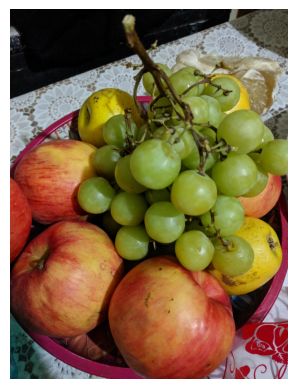

In [88]:
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load YOLOv5 model (Pre-trained)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # You can use 'yolov5m', 'yolov5l' for higher accuracy

def detect_fruits(img_path, conf_thres=0.3):
    # Load image
    img = Image.open(img_path)
    
    # Perform object detection
    results = model(img)  # Perform inference
    
    # Get results in pandas format
    df = results.pandas().xywh[0]
    
    # Print the available columns to inspect the data format
    print(df.columns)  # Check the actual column names
    
    # Filter out results with low confidence
    df = df[df['confidence'] >= conf_thres]
    
    # Draw bounding boxes and labels on the image
    draw = ImageDraw.Draw(img)
    for _, row in df.iterrows():
        # Check if the expected columns are available
        if 'x_center' in df.columns and 'y_center' in df.columns and 'width' in df.columns and 'height' in df.columns:
            x_center, y_center, width, height, conf, cls = row[['x_center', 'y_center', 'width', 'height', 'confidence', 'class']]
            class_name = model.names[int(cls)]  # Get class name for detected object
            label = f'{class_name} {conf:.2f}'  # Label with class name and confidence
            
            # Convert to corner coordinates
            x1, y1, x2, y2 = int(x_center - width / 2), int(y_center - height / 2), int(x_center + width / 2), int(y_center + height / 2)
            
            # Draw rectangle and label
            draw.rectangle([x1, y1, x2, y2], outline='red', width=3)
            draw.text((x1, y1), label, fill='red')
    
    return img, df

# Example usage
img_path = '/Users/dhruvalokesh/Desktop/My_fruits/test-multiple_fruits/apple_grape.jpg'  # Replace with your image path
img, valid_boxes = detect_fruits(img_path)

# Display the image with bounding boxes and labels
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


requirements: Ultralytics requirements ['pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...


Using cache found in /Users/dhruvalokesh/.cache/torch/hub/ultralytics_yolov5_master



requirements: AutoUpdate success ✅ 0.6s, installed 4 packages: ['pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-12-10 Python-3.11.5 torch-2.4.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/Users/dhruvalokesh/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


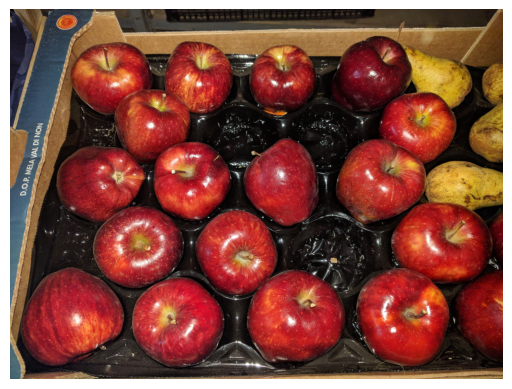

Detected fruits and their counts:
Apple: 18
Strawberry: 0
Mango: 0
Grape: 0
Banana: 0

Estimated total calories: 1710 kcal


In [87]:
import torch
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib.pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or 'yolov5m', 'yolov5l' for larger models

def detect_fruits_and_calories(img_path, conf_thres=0.4):
    # Load the image
    img = Image.open(img_path)
    
    # Perform inference with the YOLOv5 model
    results = model(img)

    # Parse results to extract bounding boxes and labels
    df = results.pandas().xywh[0]  # Get dataframe of results
    draw = ImageDraw.Draw(img)
    
    # Initialize fruit count and calorie calculation
    fruit_counts = {'apple': 0, 'strawberry': 0, 'mango': 0, 'grape': 0, 'banana': 0}
    calorie_values = {
        'apple': 95,        # Average calories per apple
        'strawberry': 4,    # Average calories per strawberry
        'mango': 150,       # Average calories per mango
        'grape': 2,         # Average calories per grape (per grape)
        'banana': 105       # Average calories per banana
    }
    total_calories = 0

    # Draw bounding boxes and count fruits
    for _, row in df.iterrows():
        x_center, y_center, width, height, conf, cls, class_name = row[['xcenter', 'ycenter', 'width', 'height', 'confidence', 'class', 'name']]
        
        if class_name in fruit_counts:  # Only count specified fruits
            fruit_counts[class_name] += 1
            
            # Calculate total calories for the detected fruit
            total_calories += calorie_values[class_name]
        
        # Get bounding box coordinates
        x_min = int((x_center - width / 2) * img.width)
        y_min = int((y_center - height / 2) * img.height)
        x_max = int((x_center + width / 2) * img.width)
        y_max = int((y_center + height / 2) * img.height)
        
        # Draw the bounding box and label on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline='red', width=3)
        draw.text((x_min, y_min), f'{class_name} {conf:.2f}', fill='red')

    # Return the image with bounding boxes and the fruit counts and calories
    return img, fruit_counts, total_calories

# Example usage
img_path = '/Users/dhruvalokesh/Desktop/My_fruits/test-multiple_fruits/apple_pear.jpg'  # Replace with your image path
img, fruit_counts, total_calories = detect_fruits_and_calories(img_path)

# Plot the image  # For Jupyter notebooks
plt.imshow(img)
plt.axis('off')  # Hide axis for a cleaner look
plt.show()

# Print the detected fruit counts
print("Detected fruits and their counts:")
for fruit, count in fruit_counts.items():
    print(f"{fruit.capitalize()}: {count}")

# Print the total estimated calories
print(f"\nEstimated total calories: {total_calories} kcal")



In [ ]:
%matplotlib inline